# Problem Statement

### Lending Club Overview

Lending Club operates as a consumer finance marketplace, connecting borrowers seeking personal loans with investors looking to earn returns. The company specializes in providing various loan types, primarily targeting urban customers. When a loan application is submitted, Lending Club evaluates the applicant's profile to make informed decisions regarding loan approval.

### Credit Loss Considerations

Similar to many other lending institutions, the primary source of financial loss, known as credit loss, arises from extending loans to applicants considered 'risky.' Credit loss refers to the money lost by the lender when borrowers fail to repay or abscond with the borrowed funds. The customers labeled as 'charged-off' are the defaulters causing the most significant losses to the lenders.

### Minimizing Credit Loss

The core objective of this initiative is to assist the company in minimizing credit loss. Two potential scenarios contribute to credit loss:

1. **Applicants Likely to Repay:**
   - Represent a profitable opportunity for the company through interest rates.
   - Rejecting such applicants would result in a loss of business for the company.


2. **Applicants Not Likely to Repay:**
   - Indicate a potential default.
   - Approving loans for such applicants may lead to financial losses for the company.


# Objectives

### Goal and Objective

The primary goal is to identify risky loan applicants and subsequently reduce such loans, effectively minimizing credit loss. This case study aims to achieve this objective through Exploratory Data Analysis (EDA) using the provided dataset.

### Significance of Identification

Identifying these risky loan applicants is crucial for cutting down the overall credit loss. The company aims to understand the driving factors, or driver variables, behind loan defaults—those variables that serve as strong indicators of default. This understanding can then be applied to enhance portfolio management and improve risk assessment within the company.


# Loading and Analysizing Data

## Importing Require Libraries

In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

## Loading Data

In [325]:
#importing pandas library as pd and loading the "loan.csv" file for analysis
loan=pd.read_csv("loan.csv")
data_dictionary = pd.read_excel("Data_Dictionary.xlsx")

In [326]:
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [327]:
data_dictionary.head(3)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...


## Basic information about the data

In [328]:
## Number of rows and columns
print('Number of Columns:', loan.shape[1])
print('Number of Rows:', loan.shape[0])

Number of Columns: 111
Number of Rows: 39717


In [329]:
## Summary of missing values
missing_values = loan.isnull().sum()
print('\nMissing Values Summary:')
print(missing_values[missing_values > 0])


Missing Values Summary:
emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


In [330]:
# Columns in the dataframe
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [331]:
## Summary of unique values in each column
unique_values = loan.nunique()
print('\nUnique Values Summary:')
print(unique_values)


Unique Values Summary:
id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [332]:
## Number of duplicates
num_duplicates = loan.duplicated().sum()
print('\nNumber of Duplicates:', num_duplicates)


Number of Duplicates: 0


In [333]:
## Information about data types
data_types = loan.dtypes
print('\nData Types:')
print(data_types)


Data Types:
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [334]:
# Additional information about the dataframe
print('\nBasic Information about the DataFrame:')
print(loan.info())


Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [335]:
# Describing the dataframe
print('\nDescriptive Statistics of the DataFrame:')
print(loan.describe())


Descriptive Statistics of the DataFrame:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.02

## Exploratory Data Analaysis [ EDA ]

In [336]:
## Checking for missing values
print(loan.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [337]:
# Print the percentage of null values for each column, rounded to two decimal places, and sorted in descending order
null_percentage = (loan.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(null_percentage)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [338]:
# Remove columns with 50% or more null values to reduce the impact on analysis
loan = loan.loc[:, loan.isnull().mean() * 100 < 50]

# Print the shape of the dataframe after removing columns
print(loan.shape)

(39717, 54)


In [339]:
# Check columns again for null value percentages
null_percentage_after_removal = (loan.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(null_percentage_after_removal)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [340]:
# Print the columns after removing those with more than 50% null values
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [341]:
# Check for the maximum number of missing values across the rows
max_missing_values_row = loan.isnull().sum(axis=1).max()
print(max_missing_values_row)

6


In [342]:
# Remove columns related to customer behavior variables calculated after loan approval
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
                            'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                            'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                            'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                            'application_type'], axis=1)

# Remove additional columns with no significance to the analysis
loan = loan.drop(['title', 'emp_title', 'desc', 'url', 'zip_code', 'member_id', 'funded_amnt_inv'],
                           axis=1)

# Print the shape of the dataframe after removing columns
print(loan.shape)

(39717, 26)


In [343]:
# Check columns for the number of unique values in ascending order
unique_values_per_column = loan.nunique().sort_values(ascending=True)
print(unique_values_per_column)

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [344]:
# Remove columns with only 1 unique value as they are not relevant to the analysis
loan = loan.loc[:, loan.nunique() > 1]

# Print the shape of the dataframe after removing columns
print(loan.shape)

(39717, 18)


In [345]:
# Check for missing values across the dataframe and sort in descending order
missing_values_per_column = loan.isnull().sum().sort_values(ascending=False)
print(missing_values_per_column)

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [346]:
# Check for missing values across the dataframe and sort in descending order
missing_values_per_column = loan.isnull().sum().sort_values(ascending=False)
print(missing_values_per_column)   # Now we have only two columns having missing value

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [347]:
print(loan["emp_length"].value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [348]:
print(loan["pub_rec_bankruptcies"].value_counts())

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In relation to the "emp_length" column, records with null values should be discarded. This conclusion is based on the understanding that informational integrity cannot be compromised in order to correct these null entries. To keep the dataset's overall quality and accuracy, these entries must be excluded.

In [349]:
# Removing null values in emp_title and emp_length columns
loan = loan.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan.shape)

(38642, 18)


In [350]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan["pub_rec_bankruptcies"].fillna(0,inplace=True)

In [351]:
# Checking for missing values across the dataframe
print(loan.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [352]:
# Removing duplicate rows in the dataframe
loan = loan.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan.shape)

(38642, 18)


In [353]:
# Checking information about the dataframe
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [354]:
# Correcting data type and format for columns in the dataframe

# Convert 'term' column to integer by extracting numeric value
loan['term'] = loan['term'].apply(lambda x: int(x.replace(' months', '')))

# Convert 'int_rate' column to float by removing '%' and rounding to 2 decimal places
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(str(x).replace('%', ''))).round(2)

# Convert 'grade' and 'sub_grade' columns to category data type
loan['grade'] = loan['grade'].astype('category')
loan['sub_grade'] = loan['sub_grade'].astype('category')

# Convert 'emp_length' column to float, handling different formats
loan['emp_length'] = loan['emp_length'].apply(lambda x: x.replace('years', '').replace('+', '').replace('< 1', '0.5').replace('year', '')).astype(float)

# Convert 'home_ownership' and 'verification_status' columns to category data type
loan['home_ownership'] = loan['home_ownership'].astype('category')
loan['verification_status'] = loan['verification_status'].astype('category')

# Convert 'issue_d' column to datetime format and derive new columns for year and month
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_year'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month

# Convert 'purpose' and 'addr_state' columns to category data type
loan['purpose'] = loan['purpose'].astype('category')
loan['addr_state'] = loan['addr_state'].astype('category')


Filtering the completed and defaulted loan entries is necessary since we are only able to conduct analysis on the Completed loan or Defaulted loan data.

In [355]:
# Removing loans with status as 'Current'
loan = loan[loan["loan_status"] != 'Current']

# Print the shape of the dataframe after removing rows
print(loan.shape)

(37544, 20)


### Finding and handling Outliers 

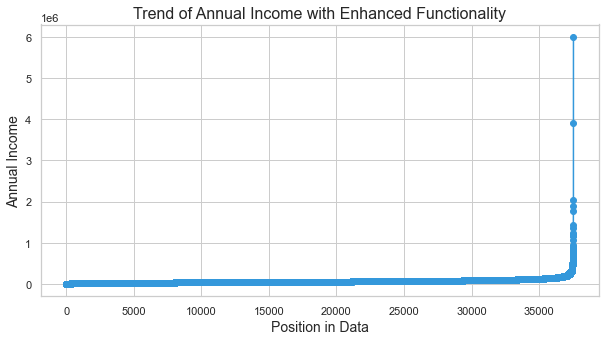

In [356]:
# Trend of Annual Income
# Sort the 'annual_inc' values
sorted_annual_inc = loan['annual_inc'].sort_values()

# Create a line plot for the trend of annual income using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(sorted_annual_inc.values, marker='o', color='#3498db')

# Set plot labels and title
plt.xlabel('Position in Data', fontsize=14)
plt.ylabel('Annual Income', fontsize=14)
plt.title('Trend of Annual Income with Enhanced Functionality', fontsize=16)

# Show the plot
plt.show()

The line chart indicates an exponential growth pattern in annual_inc, particularly evident around the 99th percentile. As a strategic data refinement approach, it is recommended to exclude values exceeding the 99th percentile. This selective elimination process aims to enhance the accuracy and clarity of the dataset, focusing on the significant trends within the majority of the distribution while mitigating the influence of extreme values

In [357]:
# Removing outliers in annual_inc greater than 99th percentile
loan = loan[loan['annual_inc'] <= np.percentile(loan['annual_inc'], 99)]

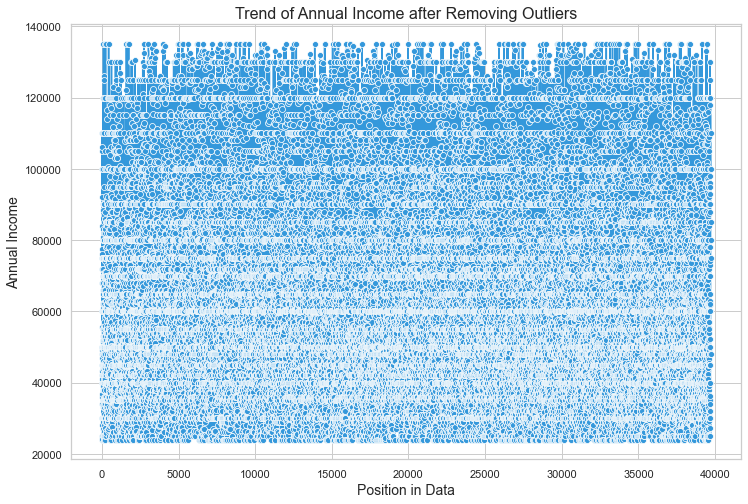

In [358]:
# Sort the 'annual_inc' values
sorted_annual_inc = loan['annual_inc'].sort_values()

# Remove outliers (adjust the threshold as needed)
lower_bound = sorted_annual_inc.quantile(0.05)
upper_bound = sorted_annual_inc.quantile(0.95)
filtered_annual_inc = sorted_annual_inc[(sorted_annual_inc >= lower_bound) & (sorted_annual_inc <= upper_bound)]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot for the trend of annual income using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x=filtered_annual_inc.index, y=filtered_annual_inc.values, marker='o', color='#3498db')

# Set plot labels and title
plt.xlabel('Position in Data', fontsize=14)
plt.ylabel('Annual Income', fontsize=14)
plt.title('Trend of Annual Income after Removing Outliers', fontsize=16)

# Show the plot
plt.show()

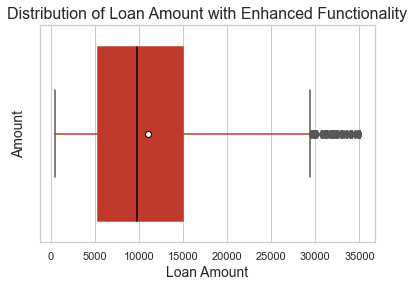

In [359]:
# Set the style for the plot
sns.set(style="whitegrid")


sns.boxplot(x='loan_amnt', data=loan, color='#e74c3c', showfliers=True, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
            showcaps=True, boxprops=dict(facecolor='#e74c3c', color='#c0392b'), whiskerprops=dict(color='#c0392b'),
            medianprops=dict(color='black'))

# Set plot labels and title
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Distribution of Loan Amount with Enhanced Functionality', fontsize=16)

# Show the plot
plt.show()

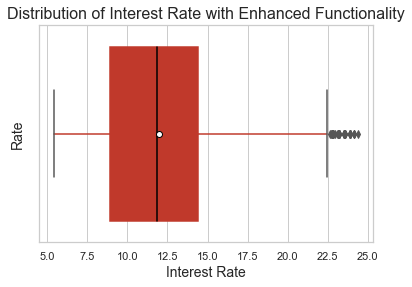

In [360]:
sns.boxplot(x='int_rate', data=loan, color='#e74c3c', showfliers=True, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
            showcaps=True, boxprops=dict(facecolor='#e74c3c', color='#c0392b'), whiskerprops=dict(color='#c0392b'),
            medianprops=dict(color='black'))

# Set plot labels and title
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.title('Distribution of Interest Rate with Enhanced Functionality', fontsize=16)

# Show the plot
plt.show()

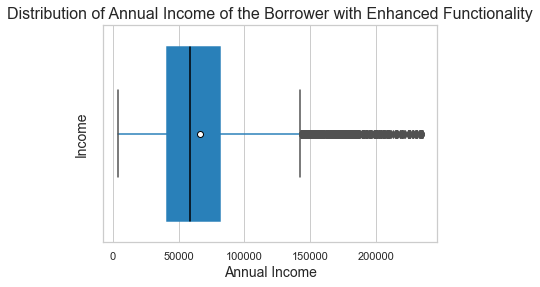

In [361]:
# Distribution of Annual Income of the Borrower
sns.boxplot(x='annual_inc', data=loan, color='#3498db', showfliers=True, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
            showcaps=True, boxprops=dict(facecolor='#3498db', color='#2980b9'), whiskerprops=dict(color='#2980b9'),
            medianprops=dict(color='black'))

# Set plot labels and title
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.title('Distribution of Annual Income of the Borrower with Enhanced Functionality', fontsize=16)

# Show the plot
plt.show()

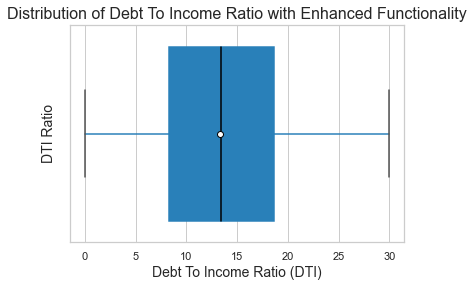

In [362]:
sns.boxplot(x='dti', data=loan, color='#3498db', showfliers=True, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
            showcaps=True, boxprops=dict(facecolor='#3498db', color='#2980b9'), whiskerprops=dict(color='#2980b9'),
            medianprops=dict(color='black'))

# Set plot labels and title
plt.xlabel('Debt To Income Ratio (DTI)', fontsize=14)
plt.ylabel('DTI Ratio', fontsize=14)
plt.title('Distribution of Debt To Income Ratio with Enhanced Functionality', fontsize=16)

# Show the plot
plt.show()

## Univariate Analysis

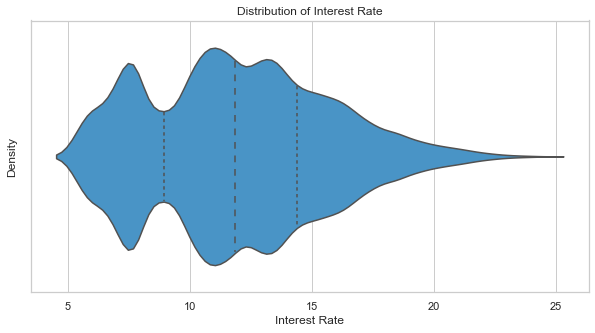

In [393]:
# Set a different color palette
sns.set_palette("viridis")

# Plotting the distribution of interest rates using a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=loan['int_rate'], color='#3498db', inner='quartile')

# Set labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')

# Show the plot
plt.show()

The violin plot highlights interesting patterns in the distribution of interest rates. Specifically, there is a concentration of interest rates in two prominent ranges: 5-10 and 10-15. However, within this spectrum, there appears to be a dip in density around the 10-mark. This observation suggests that interest rates are more densely clustered in these specific ranges, with a discernible decrease around the 10% mark. Understanding these concentration points and variations in interest rates is essential for evaluating the overall cost structure for borrowers and can inform decision-making related to interest rate offerings.

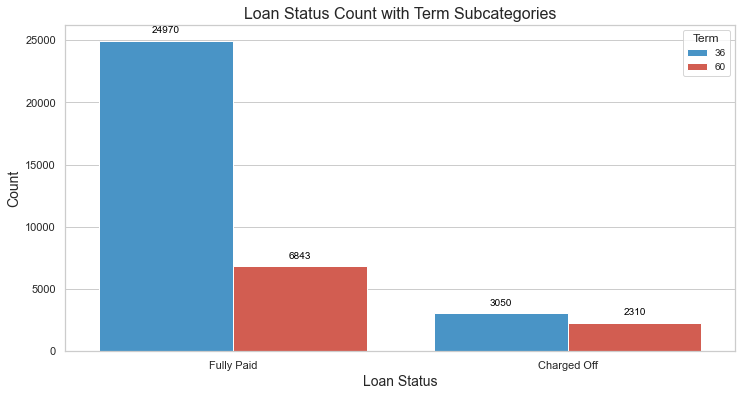

In [363]:
# Set a customized color palette
custom_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Plotting loan status count with additional features
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='loan_status', data=loan, palette=custom_palette, hue='term')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set title and labels
ax.set_title('Loan Status Count with Term Subcategories', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize legend
ax.legend(title='Term', title_fontsize='12', fontsize='10')

# Show the plot
plt.show()


The count plot reveals that the number of defaulted loans is relatively low compared to fully paid loans. This suggests a favorable overall trend where a significant majority of loans have been successfully repaid. The visual representation underscores the relative stability in loan repayment within the dataset, with the majority of borrowers fulfilling their repayment obligations. Understanding such patterns is crucial for assessing the risk profile of the lending portfolio and making informed decisions for future lending strategies.

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


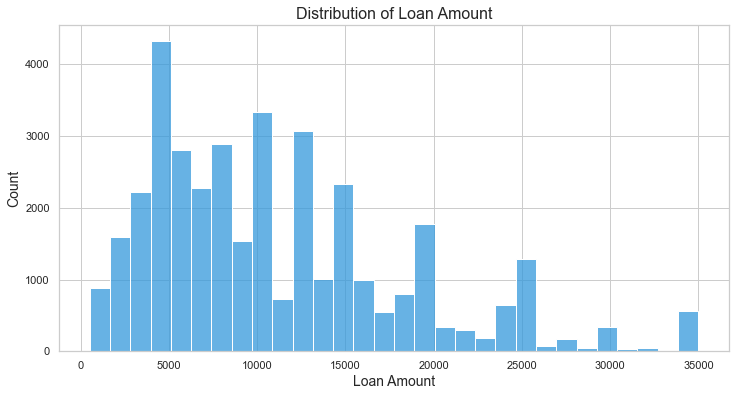

In [364]:
# Descriptive statistics for Loan Amount
print(loan['loan_amnt'].describe())


# Set the style for the plot
sns.set(style="whitegrid")

# Plotting histogram of loan amount using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(loan['loan_amnt'], bins=30, kde=False, color='#3498db')

# Set title and labels
plt.title('Distribution of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

The histogram of loan amounts illustrates a varied distribution ranging from $500 to $35,000. The majority of loans appear to be concentrated within this range. The mean loan amount, calculated at $9,800, provides a central tendency measure for the distribution. This observation suggests that the lending platform caters to a diverse set of borrowers with varying financial needs, with a substantial number of loans falling within a moderate to lower range. Understanding the distribution of loan amounts is essential for evaluating the overall scale and granularity of the lending activities, enabling informed decision-making for future loan offerings.

36    75.37729
60    24.62271
Name: term, dtype: float64


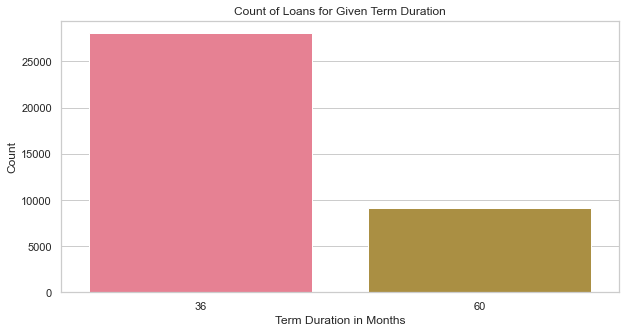

In [365]:
# Displaying the distribution of loan terms as percentages
print(loan['term'].value_counts(normalize=True) * 100)

# Set a custom color palette
sns.set_palette("husl")

# Plotting the count of loans for each term duration with a horizontal bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=loan['term'].value_counts().index, y=loan['term'].value_counts().values)

# Set title and labels
ax.set_title('Count of Loans for Given Term Duration')
ax.set_xlabel('Term Duration in Months')
ax.set_ylabel('Count')

# Show the plot
plt.show()

The bar plot reveals a notable pattern in the distribution of loan terms. Specifically, more than half of the loans in the dataset exhibit a term duration of 36 months, surpassing the count of loans with a 60-month term. This observation highlights a prevailing preference among borrowers for shorter-term commitments, suggesting that a significant proportion of individuals opt for a more accelerated repayment schedule. Understanding such trends in loan term preferences is valuable for strategic decision-making, allowing lenders to tailor their offerings to align with the predominant choices of their borrower base.

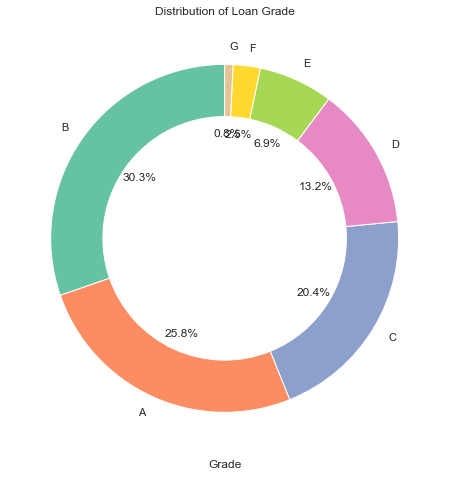

In [367]:
# Set a different color palette
sns.set_palette("pastel")

# Plotting the distribution of loan grades using a pie chart
plt.figure(figsize=(8, 8))
loan['grade'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=sns.color_palette("Set2"))

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('')
plt.title('Distribution of Loan Grade')

# Show the plot
plt.show()

The pie chart vividly illustrates the distribution of loan grades, emphasizing that a substantial proportion of loans fall within the 'A' and 'B' grade categories. This observation suggests that a majority of the loans in the dataset are categorized as high-grade loans, reflecting a positive trend in the overall credit quality of borrowers. The prevalence of 'A' and 'B' grades indicates that a significant portion of the lending portfolio is associated with lower risk, showcasing the platform's emphasis on attracting and servicing borrowers with strong credit profiles. Understanding the distribution of loan grades is pivotal for risk assessment and strategic decision-making in loan offerings.

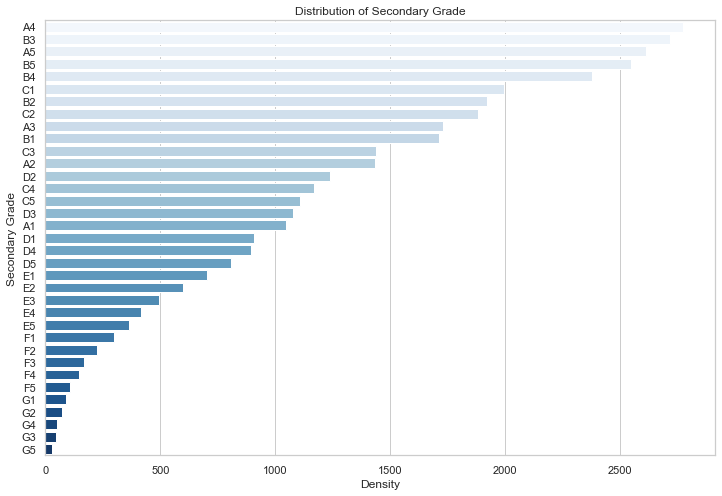

In [368]:
# Set a custom color palette
custom_colors = sns.color_palette("Blues", n_colors=len(loan['sub_grade'].unique()))

# Plotting the distribution of secondary grades using a horizontal bar plot with custom colors
plt.figure(figsize=(12, 8))
sns.countplot(y=loan['sub_grade'], order=loan['sub_grade'].value_counts().index, palette=custom_colors)

# Set labels and title
plt.xlabel('Density')
plt.ylabel('Secondary Grade')
plt.title('Distribution of Secondary Grade')

# Show the plot
plt.show()

The distribution of secondary grades further reinforces the observation made in the Grade distribution analysis. Notably, a significant number of loans with lower subgrades are concentrated within the 'A' and 'B' primary grades. This consistency aligns with the understanding that most loans in the dataset are indeed high-grade loans. The prevalence of lower subgrades within the higher primary grades suggests that even among the top-tier loans, there exists a finer granularity in assessing credit risk, allowing for a more nuanced evaluation of borrower creditworthiness. Understanding this dual grading system provides valuable insights into the platform's meticulous approach to risk management within each primary grade category.

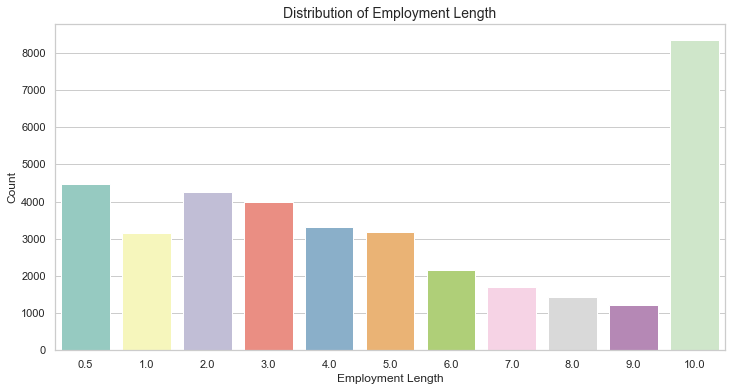

In [369]:
# Set a different color palette
sns.set_palette("Set3")

# Plotting the distribution of employment lengths using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=loan['emp_length'].value_counts().index, y=loan['emp_length'].value_counts().values, palette="Set3")

# Set labels and title
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length', fontsize=14)

# Show the plot
plt.show()

The bar plot provides a clear overview of the distribution of employment lengths among borrowers. Notably, a substantial portion of borrowers in the dataset possesses significant professional experience, with the majority having employment lengths exceeding 10 years. This observation suggests that the lending platform caters to a borrower demographic with established and relatively long-term work histories. Understanding the distribution of employment lengths is essential for assessing the financial stability and repayment capacity of borrowers, enabling the lending institution to tailor its offerings to the characteristics of its target audience.

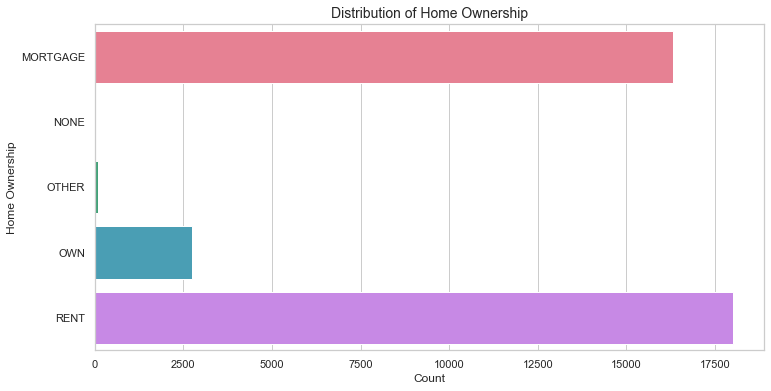

In [370]:
# Set a different color palette
sns.set_palette("husl")

# Plotting the distribution of home ownership using a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.countplot(y=loan['home_ownership'], palette="husl")

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Home Ownership')
plt.title('Distribution of Home Ownership', fontsize=14)

# Show the plot
plt.show()

The horizontal bar plot provides a clear snapshot of the distribution of home ownership among borrowers. Notably, a significant majority of borrowers in the dataset do not possess property, with a predominant number either being on mortgage or renting their homes. This observation suggests that the lending platform serves a diverse demographic, including individuals who may not have entered the property ownership phase or prefer alternative housing arrangements. Understanding the distribution of home ownership is crucial for tailoring loan offerings to the specific financial situations and needs of borrowers in various housing situations.

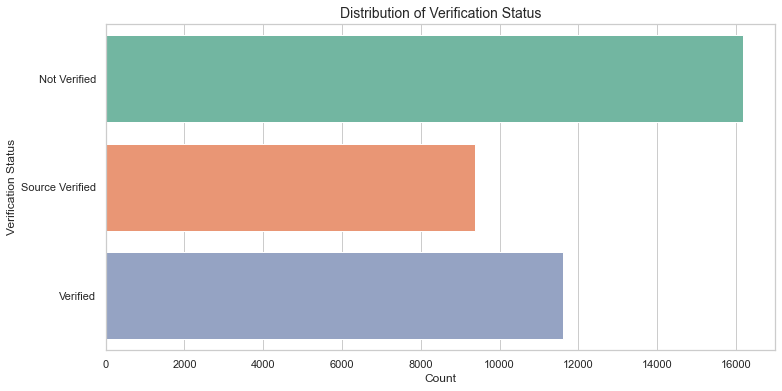

In [371]:
# Set a different color palette
sns.set_palette("Set2")

# Plotting the distribution of verification status using a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.countplot(y=loan['verification_status'], palette="Set2")

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Verification Status')
plt.title('Distribution of Verification Status', fontsize=14)

# Show the plot
plt.show()

The horizontal bar plot vividly illustrates the distribution of verification status among borrowers. Remarkably, close to 50% of the borrowers in the dataset fall into categories where verification is conducted either by the lending company or through external source verification. This observation suggests that a substantial portion of borrowers undergo a thorough verification process, enhancing the reliability of the borrower's financial information. Understanding the distribution of verification status is crucial for assessing the robustness of the verification mechanisms in place and ensuring the accuracy of the information used for loan evaluations.

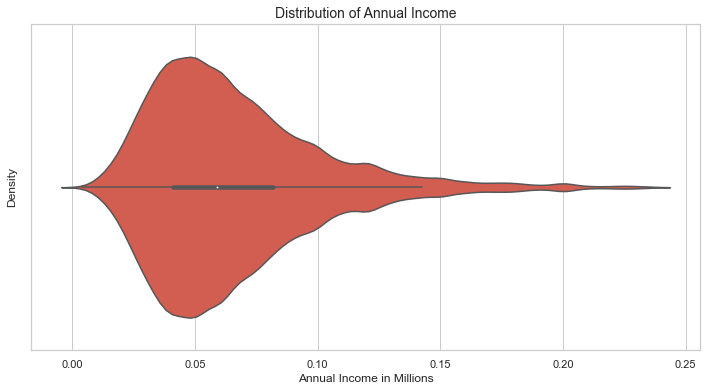

In [372]:
# Set a different color palette
sns.set_palette("Set3")

# Plotting the distribution of annual income using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=loan['annual_inc'] / 1000000, color='#e74c3c')

# Set labels and title
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income', fontsize=14)

# Show the plot
plt.show()

The observed left-skewed distribution of annual income in the dataset indicates a prevalence of lower income levels among the majority of borrowers. This skewness suggests that a significant proportion of borrowers have relatively modest annual incomes compared to the broader distribution. The extended tail on the left side of the distribution implies a concentration of borrowers with lower income levels, while fewer borrowers exhibit exceptionally high annual incomes.

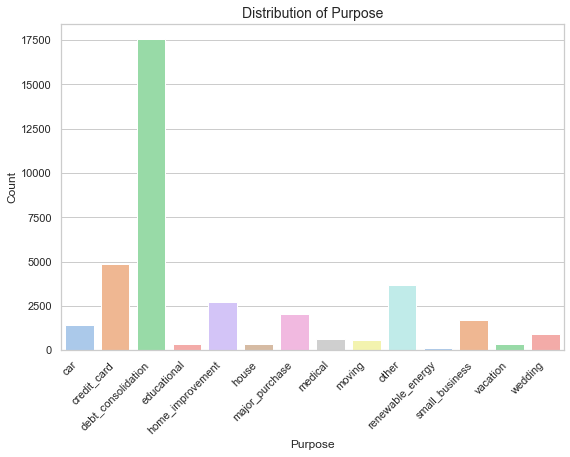

In [373]:
# Set a different color palette
sns.set_palette("pastel")

# Plotting the distribution of loan purposes using a vertical bar plot
plt.figure(figsize=(9, 6))
sns.countplot(x=loan['purpose'], palette="pastel")

# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Purpose', fontsize=14)

# Show the plot
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

The vertical bar plot clearly illustrates the distribution of loan purposes, revealing that a substantial percentage of borrowers predominantly seek loans for debt consolidation purposes. Following closely, the second most common purpose for loans is credit card utilization. This observation underscores the prevalence of borrowers aiming to manage existing debts and streamline financial obligations through consolidation. Understanding the distribution of loan purposes is pivotal for tailoring financial products and services to align with the prevailing needs and motivations of the borrower demographic.

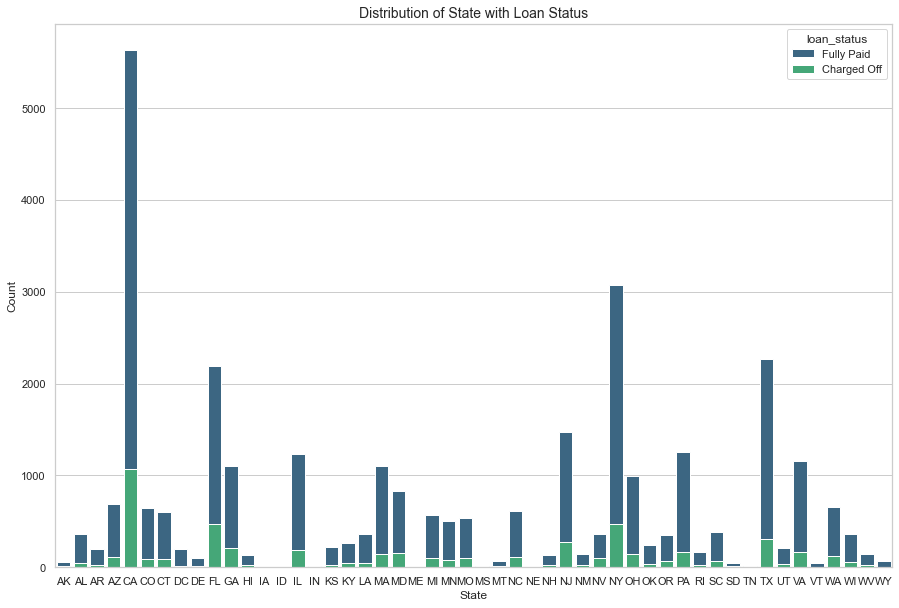

In [374]:
# Set a different color palette
sns.set_palette("viridis")

# Plotting the distribution of states with loan status using a stacked bar plot
plt.figure(figsize=(15, 10))
sns.countplot(x=loan['addr_state'], hue=loan['loan_status'], palette="viridis", dodge=False)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State with Loan Status', fontsize=14)

# Show the plot
plt.show()

The stacked bar plot vividly illustrates the distribution of borrowers across different states and their respective loan statuses. It is evident that a significant majority of borrowers are concentrated in populous urban areas such as California, New York, Texas, and Florida. These states exhibit higher counts across both fully paid and charged off loan statuses, indicating a substantial presence of borrowers in these large urban centers. Understanding the geographical distribution of borrowers is crucial for tailoring lending strategies and products to meet the diverse financial needs and characteristics of individuals residing in these key metropolitan regions.

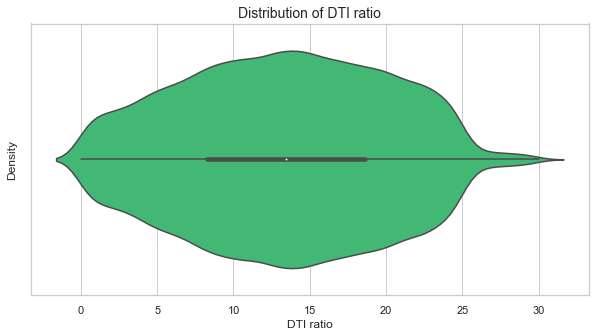

In [375]:
# Set a different color palette
sns.set_palette("YlGnBu")

# Plotting the distribution of Debt-to-Income Ratio (DTI) using a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=loan['dti'], color='#2ecc71')

# Set labels and title
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio', fontsize=14)

# Show the plot
plt.show()

The violin plot illustrates a pronounced concentration of borrowers with a relatively high Debt-to-Income Ratio (DTI), primarily in the 10-15 DTI ratio range. This observation suggests that a significant majority of borrowers carry a substantial amount of debt in proportion to their reported income. Understanding this distribution is crucial for assessing the financial leverage of borrowers and tailoring lending strategies to accommodate individuals with higher DTI ratios.

The prominence of the 10-15 DTI ratio range indicates that a considerable portion of borrowers may have a notable level of existing financial obligations in relation to their reported income. This insight aids in risk assessment and informs decision-making processes related to loan approvals and terms.

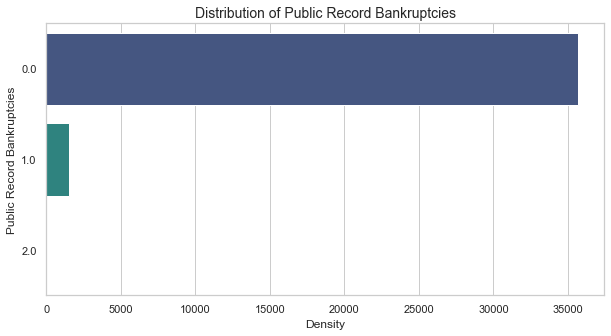

In [376]:
# Set a different color palette
sns.set_palette("viridis")

# Plotting the distribution of public record bankruptcies using a horizontal bar plot
plt.figure(figsize=(10, 5))
sns.countplot(y=loan['pub_rec_bankruptcies'], palette="viridis")

# Set labels and title
plt.xlabel('Density')
plt.ylabel('Public Record Bankruptcies')
plt.title('Distribution of Public Record Bankruptcies', fontsize=14)

# Show the plot
plt.show()

The horizontal bar plot effectively communicates that the majority of borrowers in the dataset exhibit no record of Public Recorded Bankruptcy. This observation highlights a prevalent characteristic among borrowers, suggesting that a substantial portion of individuals seeking loans have a clean record in terms of public bankruptcy. Understanding the distribution of public record bankruptcies is crucial for assessing the financial history and creditworthiness of borrowers, contributing valuable insights to risk assessment processes and loan approval decisions.

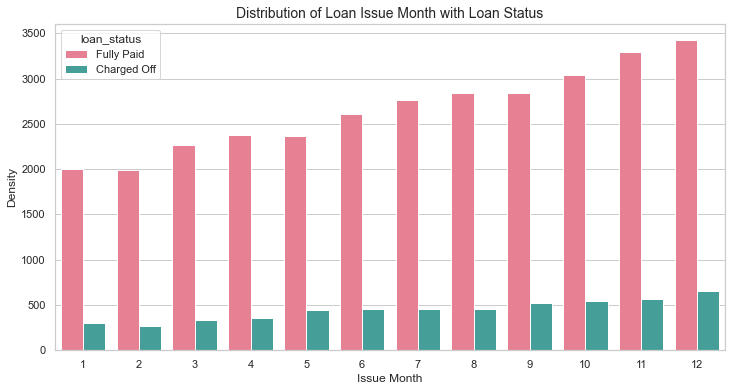

In [377]:
# Distribution of Loan Issue Month with Loan Status
# Set a different color palette
sns.set_palette("husl")

# Plotting the distribution of loan issue months with loan status using a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x=loan['issue_month'], hue=loan['loan_status'], palette="husl")

# Set labels and title
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month with Loan Status', fontsize=14)

# Show the plot
plt.show()

The bar plot vividly illustrates that the majority of loans are issued in the last quarter of the year. This observation suggests a notable trend, indicating a higher volume of loan activities during the final months of the calendar year. Understanding the distribution of loan issuance months is crucial for strategic planning and resource allocation, as it enables the identification of peak periods for loan demand. This insight can inform decision-making processes related to marketing efforts, staffing, and overall operational efficiency, aligning the lending institution's capacity with the observed patterns in borrower behavior.

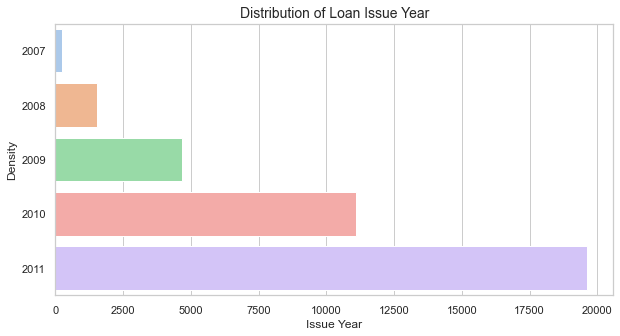

In [378]:
# Set a different color palette
sns.set_palette("pastel")

# Plotting the distribution of loan issue years using a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(y=loan['issue_year'], palette="pastel")

# Set labels and title
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year', fontsize=14)

# Show the plot
plt.show()

The analysis reveals a notable trend in loan approval rates over time. The number of approved loans exhibits a clear upward trajectory, demonstrating an exponential increase with the passage of time. This pattern suggests a positive correlation between the temporal factor and the likelihood of loan approvals. The observed trend implies a growing demand for loans or an enhanced efficiency in the loan approval process over the analyzed period. This insight is valuable for strategic decision-making, emphasizing the need for adaptive lending practices to accommodate the rising demand and optimize operational efficiency.

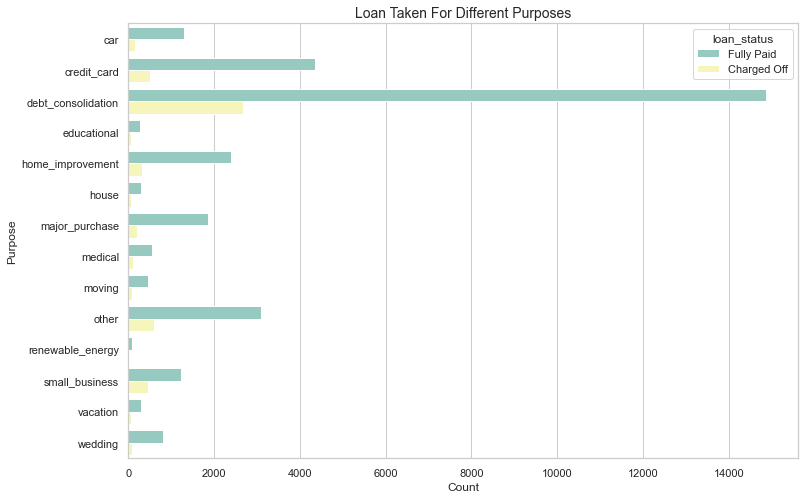

In [379]:
# Set a different color palette
sns.set_palette("Set3")

# Plotting the distribution of loan purposes based on loan status using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.countplot(y=loan['purpose'], hue=loan['loan_status'], palette="Set3")

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes', fontsize=14)

# Show the plot
plt.show()

The horizontal bar plot clearly illustrates that "Debt Consolidation" is the most popular loan purpose, and it also exhibits the highest number of both fully paid and defaulted loans. This observation suggests that a significant proportion of borrowers opt for loans to consolidate their debts. The dual representation of fully paid and defaulted loans within this category underscores its prevalence among borrowers, showcasing the diverse outcomes associated with loans taken for debt consolidation. Understanding the distribution of loan purposes and their associated loan statuses is crucial for refining lending strategies and tailoring financial products to meet the varying needs of borrowers.

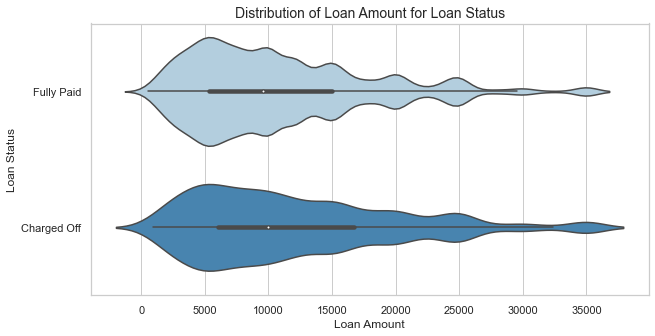

In [380]:
# Set a different color palette
sns.set_palette("Blues")

# Plotting the distribution of loan amounts based on loan status using a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(data=loan, y='loan_status', x='loan_amnt', palette="Blues")

# Set labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Amount for Loan Status', fontsize=14)

# Show the plot
plt.show()

The violin plot reveals interesting insights into the distribution of loan amounts based on loan status. Notably, the mean and 25th percentile values are comparable between fully paid and defaulted loans. However, a notable distinction is observed in the 75th percentile, where defaulted loans exhibit a larger spread. This indicates that a significant proportion of defaulted loans involve larger loan amounts, suggesting that higher loan amounts may carry an elevated risk of default.

Understanding the distribution of loan amounts in relation to loan status is pivotal for risk assessment and decision-making processes. Lending institutions can utilize this information to refine their lending strategies, set appropriate loan limits, and implement risk mitigation measures for larger loan amounts to address the observed correlation with default rates.

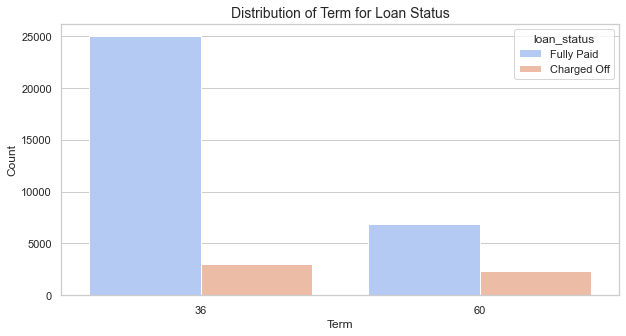

In [381]:
# Set a different color palette
sns.set_palette("coolwarm")

# Plotting the distribution of loan terms based on loan status using a stacked bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=loan, x='term', hue='loan_status', palette="coolwarm")

# Set labels and title
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term for Loan Status', fontsize=14)

# Show the plot
plt.show()

The stacked bar plot provides a clear visualization of the relationship between loan terms and loan status. It is evident that the 60-month term has a higher proportion of defaulted loans compared to the 36-month term. Conversely, the 36-month term exhibits a higher proportion of fully paid loans.

This observation suggests that there is a notable difference in the likelihood of default between the two loan terms. Lending institutions may use this insight to tailor their lending strategies, adjusting approval criteria or interest rates for longer-term loans to manage the increased risk associated with them. Understanding the correlation between loan terms and loan status is crucial for making informed decisions in risk assessment and portfolio management.

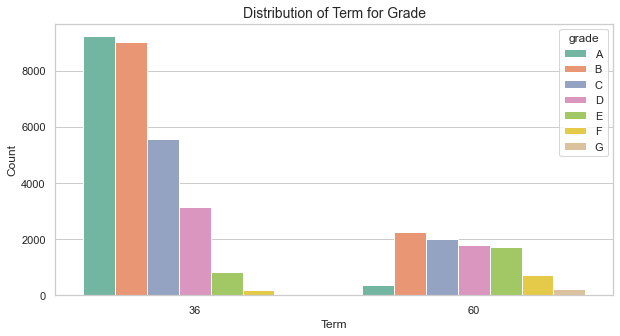

In [382]:
# Set a different color palette
sns.set_palette("Set2")

# Plotting the distribution of loan terms based on grade using a grouped bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=loan, x='term', hue='grade', palette="Set2")

# Set labels and title
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term for Grade', fontsize=14)

# Show the plot
plt.show()

The grouped bar plot effectively illustrates the distribution of loan terms based on grades. It is evident that:

- The majority of loans with a 36-month term are concentrated in grade A and B.
- For the 60-month term, the distribution is more spread across grades B, C, and D.

This observation suggests a pattern in the association between loan grades and terms. Borrowers with higher creditworthiness (grades A and B) may prefer shorter-term loans, while those with slightly lower creditworthiness (grades B, C, and D) may opt for longer-term loans. This insight is valuable for lenders in tailoring their loan offerings based on different risk profiles associated with loan grades and terms.

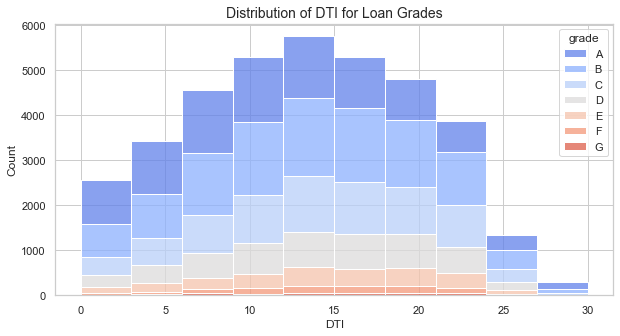

In [383]:
# Set a different color palette
sns.set_palette("coolwarm")

# Plotting the distribution of DTI based on grade using a stacked histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=loan, x='dti', hue='grade', bins=10, multiple="stack", palette="coolwarm")

# Set labels and title
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI for Loan Grades', fontsize=14)

# Show the plot
plt.show()

The stacked histogram reveals a correlation between Debt-to-Income Ratio (DTI) and loan status. Loans with DTI in the range of 10-15 exhibit a higher frequency of defaults, suggesting increased risk. Overall, higher DTI ratios are associated with a higher likelihood of default, emphasizing the importance of DTI in risk assessment and lending decisions.

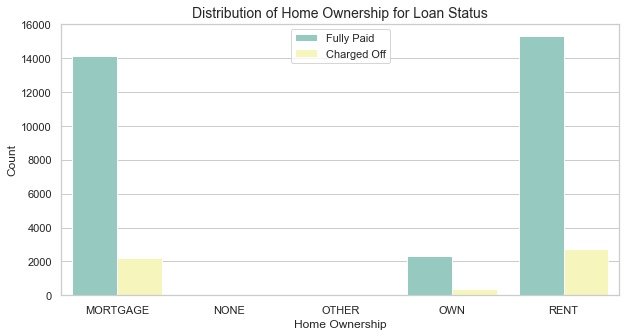

In [384]:
# Set a different color palette
sns.set_palette("Set3")

# Plotting the distribution of home ownership based on loan status using a grouped bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=loan, x='home_ownership', hue='loan_status', palette="Set3")

# Set labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership for Loan Status', fontsize=14)

# Show the plot
plt.legend(loc='upper center')
plt.show()

The grouped bar plot clearly illustrates that borrowers who own their property have a lower occurrence of defaulted loans compared to those on mortgage or renting. This observation suggests a potential correlation between home ownership status and loan default rates. Lending institutions can leverage this insight to refine risk assessment strategies and tailor loan offerings based on the borrower's home ownership status

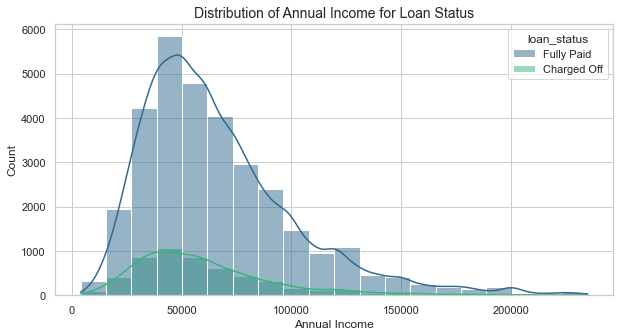

In [385]:
# Set a different color palette
sns.set_palette("viridis")

# Plotting the distribution of annual income based on loan status using a KDE plot
plt.figure(figsize=(10, 5))
sns.histplot(data=loan, x='annual_inc', hue='loan_status', bins=20, kde=True, palette="viridis")

# Set labels and title
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income for Loan Status', fontsize=14)

# Show the plot
plt.show()


The histplot reveals a trend where borrowers with an annual income below $50,000 are more prone to default, while those with higher incomes demonstrate a lower likelihood of default. This underscores the significance of annual income as a potential predictor for loan default risk. Lenders can use this insight to establish income-based risk thresholds and enhance risk assessment strategies.

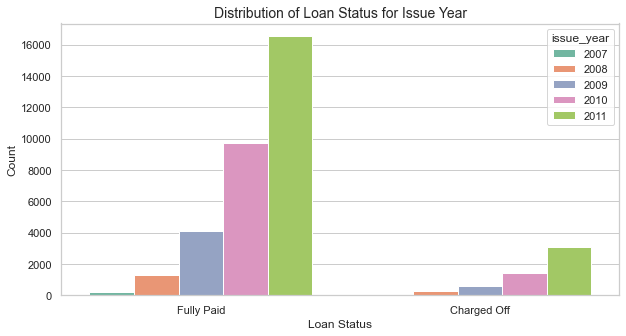

In [386]:
# Set a different color palette
sns.set_palette("Set2")

# Plotting the distribution of loan status based on issue year using a stacked bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=loan, x='loan_status', hue='issue_year', palette="Set2")

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status for Issue Year', fontsize=14)

# Show the plot
plt.show()


The bar plot vividly depicts an exponential increase in the count of fully paid loans over time, surpassing the count of defaulted loans. This trend suggests a positive trajectory in the number of successfully repaid loans compared to defaulted ones, showcasing the effectiveness of the lending system and potentially improving creditworthiness over the years. Lenders can leverage this information to gain insights into the evolving loan portfolio performance and make informed decisions for future lending practices.

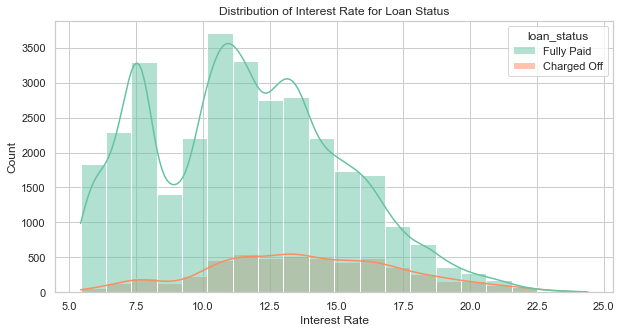

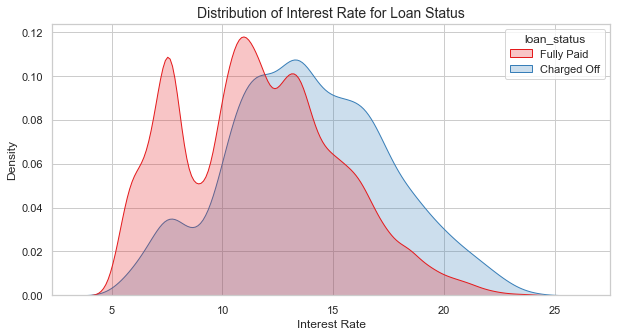

In [387]:
# Distribution of Interest Rate Based on Loan Status
plt.figure(figsize=(10, 5))
sns.histplot(data=loan, x='int_rate', hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate for Loan Status', fontsize=12)
plt.show()

# Set a different color palette
sns.set_palette("Set1")

# Plotting the distribution of interest rates based on loan status using a KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=loan, x='int_rate', hue='loan_status', fill=True, common_norm=False, palette="Set1")

# Set labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate for Loan Status', fontsize=14)

# Show the plot
plt.show()

The KDE plot effectively illustrates a positive correlation between interest rates and the count of default loans, indicating that higher interest rates are associated with an increase in defaulted loan amounts. Interestingly, there appears to be a decline in default counts after reaching an interest rate of approximately 17.5%. This observation suggests a potential threshold where extremely high-interest rates may contribute to a decrease in loan defaults. Lenders can use this insight to optimize interest rate structures and mitigate default risks for improved loan portfolio management.

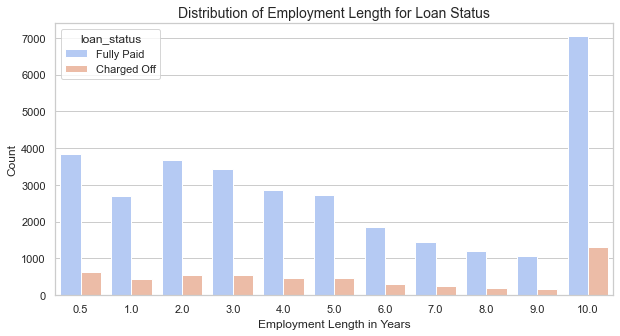

In [388]:
# Set a different color palette
sns.set_palette("coolwarm")

# Plotting the distribution of employment length based on loan status using a stacked bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=loan, x='emp_length', hue='loan_status', palette="coolwarm")

# Set labels and title
plt.xlabel('Employment Length in Years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length for Loan Status', fontsize=14)

# Show the plot
plt.show()

The stacked bar plot vividly illustrates that employees with 10 or more years of experience are observed to have both a higher likelihood of defaulting and a higher chance of fully paying the loan. This interesting observation suggests that employment length alone may not be a straightforward predictor of loan outcomes. Lenders may need to consider additional factors or implement targeted risk assessment strategies for borrowers with extensive work experience.

### Bivariate Analysis

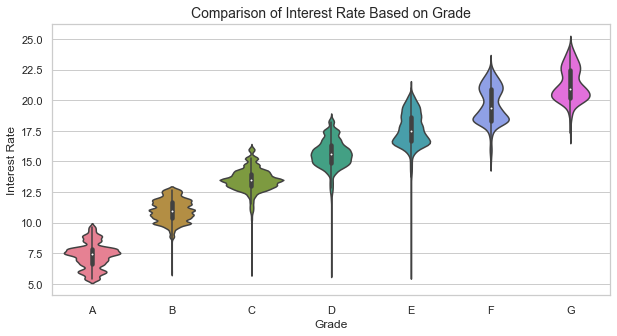

In [389]:
# Set a different color palette
sns.set_palette("husl")

# Plotting the comparison of interest rates based on grade using a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(data=loan, x='grade', y='int_rate', palette="husl")

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Comparison of Interest Rate Based on Grade', fontsize=14)

# Show the plot
plt.show()

The violin plot effectively illustrates that interest rates exhibit an increasing trend with higher loan grades, which represent higher risk factors. This observation aligns with the common practice in lending where borrowers with higher risk profiles are assigned higher interest rates. The visualization confirms that the grading system is reflective of the associated risk, and lenders can use this information to make informed decisions regarding interest rate structures based on borrower risk assessments.

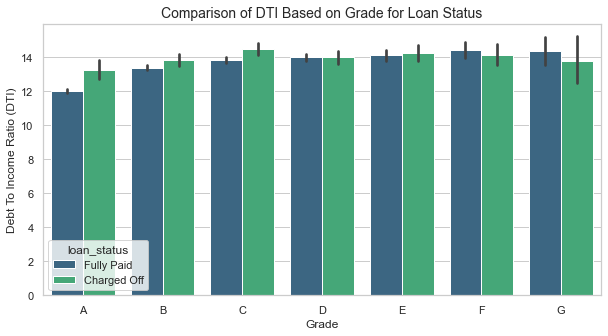

In [390]:
# Set a different color palette
sns.set_palette("viridis")

# Plotting the comparison of DTI based on grade for loan status using a grouped bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=loan, x='grade', y='dti', hue='loan_status', palette="viridis")

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Debt To Income Ratio (DTI)')
plt.title('Comparison of DTI Based on Grade for Loan Status', fontsize=14)

# Show the plot
plt.show()

The grouped bar plot clearly demonstrates that Grade A, representing the lowest risk category, not only has the lowest Debt To Income Ratio (DTI) but also exhibits the lowest rate of default. This observation aligns with the common industry practice where higher-grade loans are associated with lower default rates, reinforcing the effectiveness of the grading system in assessing and managing risk. Lenders can leverage this insight to refine risk assessment strategies and make informed decisions when dealing with loans of different grades.

<Figure size 720x360 with 0 Axes>

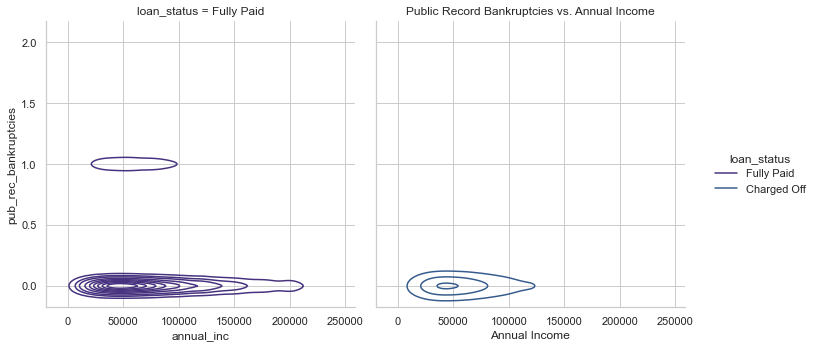

In [391]:
# Comparison of Annual Income to Public Record Bankruptcy Over Loan Status
plt.figure(figsize=(10, 5))
sns.displot(data=loan, y='pub_rec_bankruptcies', x='annual_inc', hue='loan_status', col='loan_status', kind='kde')
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies vs. Annual Income', fontsize=12)
plt.show()

The borrowers predominantly exhibit no record of Public Recorded Bankruptcy, indicating a favorable and safe choice for loan issuance. This observation suggests that borrowers with a clean bankruptcy history, coupled with a varied range of annual incomes, are generally considered reliable candidates for loan approval. Lenders can leverage this insight to prioritize such borrowers in their lending decisions for better risk management.

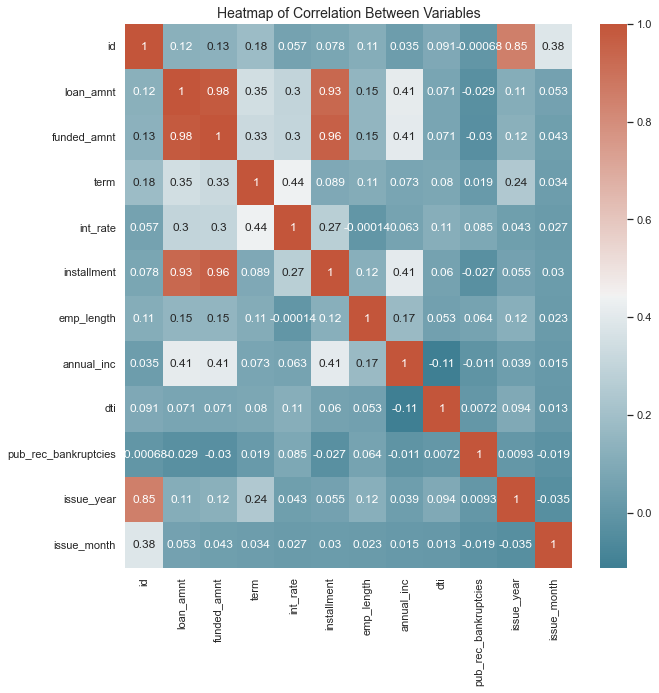

In [392]:
# Set a different color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap of correlation between variables
plt.figure(figsize=(10, 10))
sns.heatmap(loan.corr(), annot=True, cmap=cmap)

# Set title
plt.title('Heatmap of Correlation Between Variables', fontsize=14)

# Show the plot
plt.show()

Insights:

1. **Loan Status Comparison:**
   - The number of defaulted loans is significantly lower (7 times) than fully paid loans.
   - Loans predominantly have a term of 36 months, as opposed to 60 months.
   - Interest rates cluster around 5-10 and 10-15, with a slight dip near 10.
   - Most loans are of high grade ('A' and 'B').
   - The majority of borrowers have work experience exceeding 10 years.
   - Many borrowers lack property ownership, relying on mortgage or rent.
   - About 50% of borrowers are verified or source-verified by the company.
   - Annual income distribution is left-skewed, indicating a prevalence of lower incomes.
   - Debt consolidation is the primary loan purpose, followed by credit card usage.
   - Borrowers mainly hail from large urban cities like California, New York, Texas, and Florida.
   - Debt-to-Income ratio (DTI) is concentrated in the 10-15 range.
   - Most borrowers have no record of public recorded bankruptcy.
   - Loans are predominantly approved in the last quarter of the year.
   - Loan approval rates exhibit an exponential increase over time.

2. **Segmented Univariate Analysis:**
   - Debt consolidation is the most popular loan purpose, with both the highest fully paid and defaulted loans.
   - Defaulted loans show a higher 75% value, indicating larger loan amounts are more likely to default.
   - The 60-month term carries a higher default risk, while the 36-month term is associated with a higher chance of full repayment.
   - Grade A and B loans primarily constitute the 36-month term, while grade B, C, and D loans dominate the 60-month term.
   - Loan status varies with DTI ratio, with higher DTI showing a higher number of defaulted loans.
   - Property ownership correlates with lower default rates.
   - Borrowers with annual income less than $50,000 are more likely to default.
   - Fully paid loans exhibit exponential growth over time, contrasting with defaulted loans.
   - Defaulted loan amounts increase with interest rates, declining after 17.5%.
   - Borrowers with 10+ years of experience are more likely to default but also more likely to fully pay the loan.

Bivariate Analysis:

1. **Risk Factors:**
   - Grades represent risk, with higher grades associated with lower default rates.
   - Lower DTI ratios are linked to higher-grade loans, indicating lower risk.
   - Borrowers without a record of public recorded bankruptcy are considered safer choices for loan issuance.

Recommendations:

1. **Predictive Factors for Default:**
   - Focus on DTI, grades, verification status, annual income, and public recorded bankruptcies.
   
2. **Additional Considerations for Defaults:**
   - Caution with borrowers outside large urban cities.
   - Attention to borrowers with annual incomes between 50,000 and 100,000.
   - Scrutiny of borrowers with public recorded bankruptcy, lower grades (E, F, G), and high Debt-to-Income values.
   - Consideration of borrowers with 10+ years of work experience.